[ CNN 기반 CiFar10 이미지 분류 모델 ]

- 데이터셋 : Pytorch 내장 데이터셋 활용
- 학습종류 : 지도학습 + 다중분류 

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
# [1-1] 모듈 로딩
import torch                                   # 텐서 및 기본 함수들 관련
import torch.nn as nn                          # 인공신경망 관련
import torch.nn.functional as F                # 인공신경망 함수들 관련

import torchvision.datasets as datasets
import torchvision.transforms as transforms    # 이미지 전처리 변형 관련
from torchvision.datasets import CIFAR10       # 내장 데이터셋
from torch.utils.data import DataLoader   
from torch.utils.data import Subset, random_split
from torchvision.datasets import ImageFolder     

import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

import os

c:\Users\knudc\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2] 데이터 준비 - Pytorch 내장 데이터셋 로딩 <hr>

In [2]:
# [2-1] 준비해야할 것들 : 전처리용 transforms 인스턴스, 저장위치
ROOT = './data/image/'

if not os.path.exists(ROOT):
    os.makedirs(ROOT)
else:
    print(f'{ROOT} : 존재한당')

./data/image/ : 존재한당


In [3]:
# [2-2] 내장 데이터셋 다운로드
# 데이터셋 불러온 후, train과 test를 나눠서 저장하기
preprocessing = transforms.Compose(
    [
        transforms.Resize((32,32)),           ## 크기 조정
        transforms.ToTensor()                   ## (H,W,C) => (C, H, W) + 정규화 + 텐서화
    ])

cifar10_train = datasets.CIFAR10(root=ROOT, train=True, download=True, transform=preprocessing)
cifar10_test = datasets.CIFAR10(root=ROOT, train=False, download=True, transform=preprocessing)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# [2-3] 클래스 변환 데이터 생성  
IDX_TO_CLASS = {v:k for k, v in cifar10_train.class_to_idx.items()}
print(f'IDX_TO_CLASS => {IDX_TO_CLASS}')

IDX_TO_CLASS => {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [5]:
# [2-4] 데이터 로더 생성 
trainDL = DataLoader(cifar10_train, 
                     shuffle=True, 
                     generator=torch.Generator().manual_seed(42))
testDL  = DataLoader(cifar10_test,  shuffle=False)

In [6]:
for feature, target in testDL: 
    print(feature.shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])
t

In [7]:
print(len(trainDL))  # 데이터 로더가 비어 있는지 확인
print(trainDL.dataset)
print(trainDL.dataset[0])  # 첫 번째 샘플 확인

50000
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/image/
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.

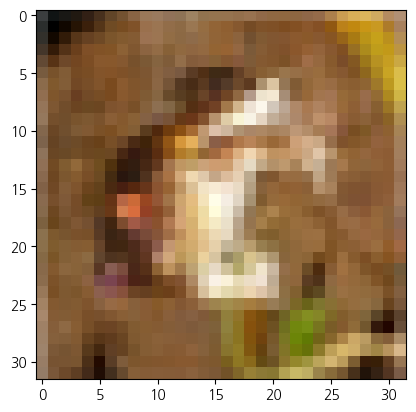

In [8]:
# plt.imshow(img[0].permute(1, 2, 0))  # 채널 순서 변경

# plt.show()

img, target = cifar10_train[0]
img.transpose_(0,2)
plt.imshow(np.array(img))
plt.show()

[3] 모델 학습 <hr>

In [ ]:
# [3-1] CNN 클래스 정의 
class CifarCNN(nn.Module):
    def __init__(self):
        super(CifarCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=1),   # (3,1,32,32)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                    # (3,32,32,32) -> (3,32,16,16)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1),   # (3,32,16,16)  ->  (3,64,8,8)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                     # (3,64,8,8)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1),   # (3,128,4,4)
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                      # (3,128,4,4)
        )
        
    
        
        self.fc1 = nn.Linear(128*4*4, 400)
        self.drop = nn.Dropout(0.4)
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, 100)
        self.fc4 = nn.Linear(100, 10) 
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = torch.flatten(x, 1)  
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.softmax(self.fc4(x))  
        return x